<a href="https://colab.research.google.com/github/IyadSultan/low-coding-AI/blob/main/02_pandas_Numpy_metplotlib_low_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pandas

You are an expert Python tutor specializing in data analysis with pandas. Provide me with a step-by-step guide on how to effectively utilize pandas to its fullest potential. Your instructions should include explanations in text along with code examples embedded directly in the text (rather than as separate chunks).

To demonstrate, use the CSV file available at this GitHub link https://github.com/kirenz/datasets/blob/master/gapminder.csv. Start by showing how to download the dataset, explore its structure, list its column names, determine its shape, and perform an initial exploratory analysis. Highlight the features and strengths of pandas throughout your explanation. Avoid using additional packages for now, focusing solely on pandas.

Step 1: Import pandas and Download the Dataset
To begin, ensure pandas is imported. Since the dataset is hosted on GitHub, we can download it using its raw URL.

In [ ]:
# %pip install pandas

import pandas as pd
url = 'https://raw.githubusercontent.com/kirenz/datasets/master/gapminder.csv'
df = pd.read_csv(url, sep=',')


Step 2: Explore the Dataset's Structure
Once the dataset is loaded, we need to understand its structure. Use the .head() method to view the first few rows:

In [ ]:
df.head(n=10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Step 3: View the Column Names
To see the column names, use the .columns attribute:

In [ ]:
df.columns

'country'

Step 4: Determine the Dataset's Shape
The shape of a DataFrame (rows and columns) is critical to understanding the dataset's size. Use the .shape attribute:

In [ ]:
df.shape

(1704, 6)

Step 5: Check the Data Types
Different columns may have different data types (e.g., integers, floats, strings). Use the .info() method to summarize the dataset, including column data types and non-null counts:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


Step 6: Perform Initial Exploratory Analysis
For numerical columns, calculate basic statistics using the .describe() method:

In [ ]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [ ]:
# prompt: I need a table showing the range of each numeric column of df

import pandas as pd

url = 'https://raw.githubusercontent.com/kirenz/datasets/master/gapminder.csv'
df = pd.read_csv(url, sep=',')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create an empty list to store the results
ranges = []

# Iterate through each numeric column
for col in numeric_df.columns:
    min_val = numeric_df[col].min()
    max_val = numeric_df[col].max()
    ranges.append([col, min_val, max_val])

# Create a DataFrame from the list of ranges
range_df = pd.DataFrame(ranges, columns=['Column', 'Min', 'Max'])

# Display the table
range_df

,Column,Min,Max
0,year,1952.000000,2.007000e+03
1,lifeExp,23.599000,8.260300e+01
2,pop,60011.000000,1.318683e+09
3,gdpPercap,241.165876,1.135231e+05


Step 7: Inspect Missing Values
To detect missing data, use .isnull() combined with .sum():

In [ ]:
df.isnull().sum()

,0
country,0
continent,0
year,0
lifeExp,0
pop,0
gdpPercap,0


Step 8: Preview Unique Values
To understand categorical variables better, use .unique():


In [ ]:
# prompt: I need the unique values of continent column of df


print(df['continent'].unique())

['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']


Step 9: Filter Data
Filtering is essential in data analysis. For example, to view data for the year 2007:

In [ ]:
# prompt: View data for countires in Europe in the year 2007


# Filter data for the year 2007
df_2007 = df[df['year'] == 2007]

# Filter data for the European continent
df_europe_2007 = df_2007[df_2007['continent'] == 'Europe']

# Display the filtered data
df_europe_2007

,country,continent,year,lifeExp,pop,gdpPercap
23,Albania,Europe,2007,76.423,3600523,5937.029526
83,Austria,Europe,2007,79.829,8199783,36126.492700
119,Belgium,Europe,2007,79.441,10392226,33692.605080
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820
383,Croatia,Europe,2007,75.748,4493312,14619.222720
407,Czech Republic,Europe,2007,76.486,10228744,22833.308510
419,Denmark,Europe,2007,78.332,5468120,35278.418740
527,Finland,Europe,2007,79.313,5238460,33207.084400
539,France,Europe,2007,80.657,61083916,30470.016700


In [ ]:
df['year'] == 2007

,year
0,False
1,False
2,False
3,False
4,False
...,...
1699,False
1700,False
1701,False
1702,False


Step 10: Summarize by Group
Pandas excels at grouping data. For instance, to find the average life expectancy per continent:

In [ ]:
# prompt: find the average life excpectency in df per continent



# Group data by continent and calculate the mean life expectancy
average_life_expectancy = df.groupby('continent')['lifeExp'].mean()

# Display the result
average_life_expectancy

,lifeExp
continent,
Africa,48.865330
Americas,64.658737
Asia,60.064903
Europe,71.903686
Oceania,74.326208


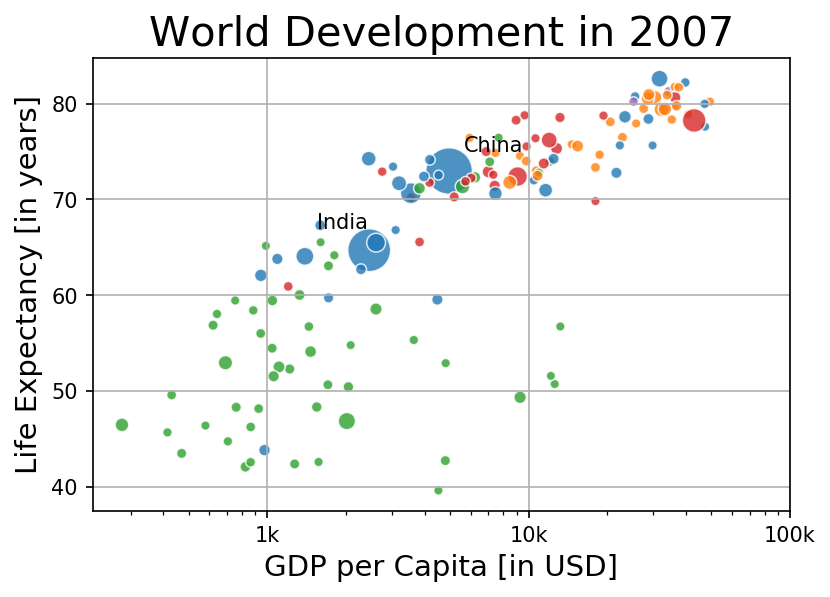

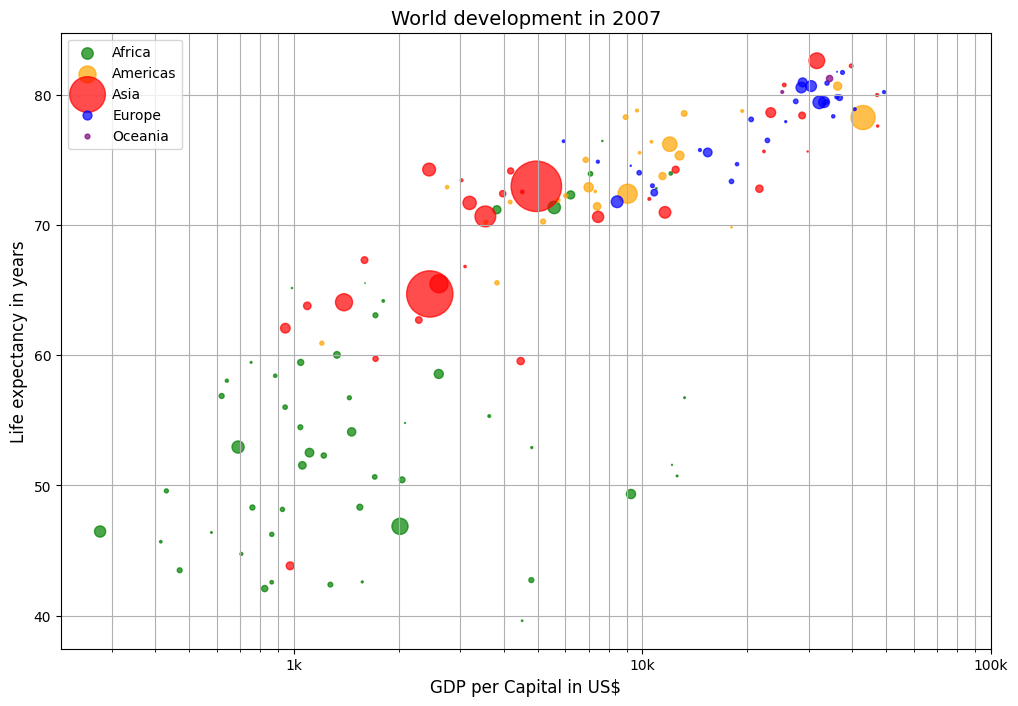

In [ ]:
# prompt: make a visualizaiton of df that shows the following
# Scatterplot
# Grid horizontal + vertical
# y axis title is Life expectancy in years
# x axis label is GDP per Capital in US$
# colors of dots according to continent name
# size of dots according to population
# x axis is logarithmic with the following breakpoints: 1k, 10k, 100k,
# Title= World development in 2007

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains columns: 'continent', 'lifeExp', 'gdpPercap', 'pop'
# Replace 'your_file.csv' with the actual file path if you are reading from a file.
# df = pd.read_csv('your_file.csv')

# Sample DataFrame (replace with your actual data)
# data = {'continent': ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'],
#         'lifeExp': [70, 75, 60, 72, 80],
#         'gdpPercap': [10000, 20000, 5000, 15000, 25000],
#         'pop': [1000000, 5000000, 2000000, 8000000, 1000000]}
# df = pd.DataFrame(data)
df_2007 = df[df['year'] == 2007]

# Create the scatterplot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Define colors for continents (customize as desired)
continent_colors = {'Asia': 'red', 'Europe': 'blue', 'Africa': 'green', 'Americas': 'orange', 'Oceania': 'purple'}

# Plot each continent separately with specified colors and sizes
for continent, group in df_2007.groupby('continent'):
  plt.scatter(group['gdpPercap'], group['lifeExp'],
              s=group['pop'] / 1000000,  # Adjust scaling factor as needed
              c=continent_colors.get(continent, 'gray'),  # Default to gray if continent color is not defined
              label=continent,
              alpha=0.7)  # Adjust alpha for better visibility

# Customize plot appearance
plt.xscale('log')  # Set logarithmic x-axis scale
plt.xticks([1000, 10000, 100000], ['1k', '10k', '100k']) # Set the breakpoints

plt.xlabel('GDP per Capital in US$', fontsize=12)
plt.ylabel('Life expectancy in years', fontsize=12)
plt.title('World development in 2007', fontsize=14)

# Add a grid
plt.grid(True, which="both", ls="-")

# Add a legend
plt.legend()


plt.show()

<ipython-input-28-4c3b288149cc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2007['color'] = data_2007['continent'].map(colors)


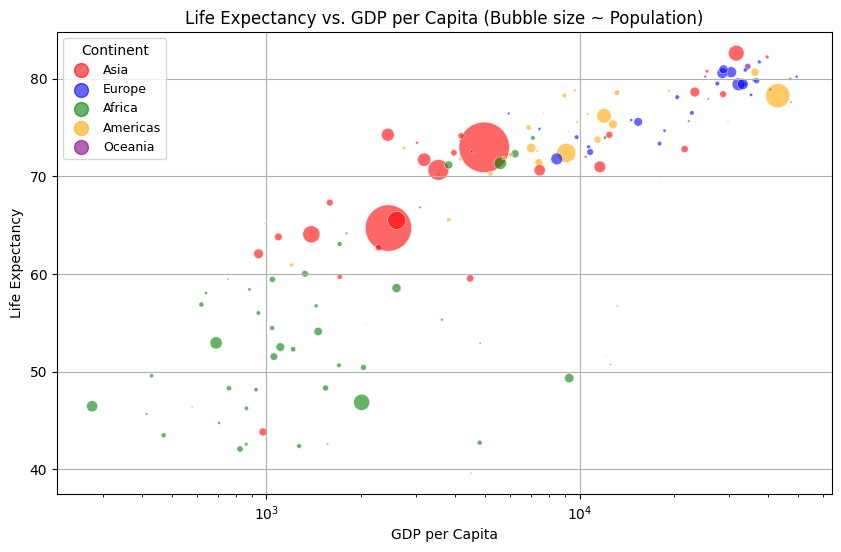

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming the dataset is named 'gapminder.csv')
# df = pd.read_csv('path_to_your_file.csv')  # Replace with the actual path to your dataset

# Filter the data for a single year, e.g., 2007 (adjust as needed)
data_2007 = df[df['year'] == 2007]

# Define the size for bubble sizes based on population
bubble_sizes = data_2007['pop'] / 1e6  # Scale population for visualization

# Define color for continents
colors = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'Americas': 'orange',
    'Oceania': 'purple'
}
data_2007['color'] = data_2007['continent'].map(colors)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    data_2007['gdpPercap'],
    data_2007['lifeExp'],
    s=bubble_sizes,
    c=data_2007['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Add labels, title, and legend
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. GDP per Capita (Bubble size ~ Population)')
plt.grid(True)

plt.xscale('log')
# Create a legend for continents
for continent, color in colors.items():
    plt.scatter([], [], c=color, alpha=0.6, s=100, label=continent)

plt.legend(title="Continent", loc='upper left', fontsize=9)
plt.show()


# matplotlon

Comprehensive Guide to Data Visualization with Matplotlib
Matplotlib is a versatile Python library for creating static, interactive, and dynamic visualizations. It is widely used in data science, engineering, and research for its flexibility and extensive customization options.

Introduction to Matplotlib
Purpose of Matplotlib:

Matplotlib is used to create 2D visualizations such as line plots, scatter plots, bar charts, and more.
It excels in producing publication-quality plots with a high degree of customization.
Basic Components of a Plot:

Figure: The overall container for all plot elements.
Axes: The area where data is plotted, which includes x- and y-axis.
Elements: Titles, labels, legends, gridlines, etc.

In [ ]:
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5]
y = [2, 4,9, 16, 25]

1. Creating a Simple Line Plot

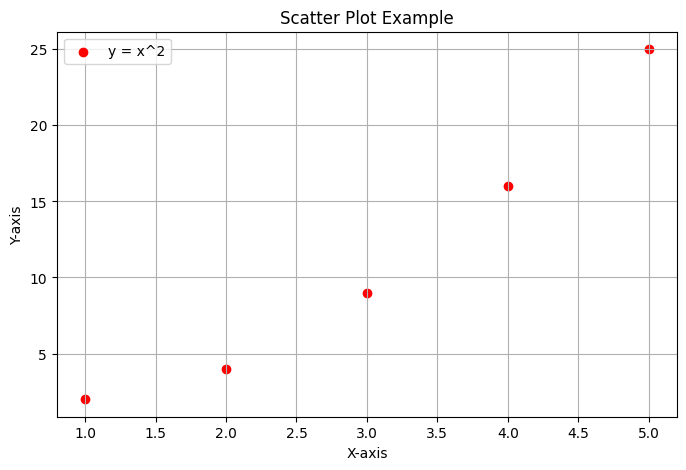

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='y = x^2')

# Add annotations
plt.title("Scatter Plot Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

2. Scatter Plot

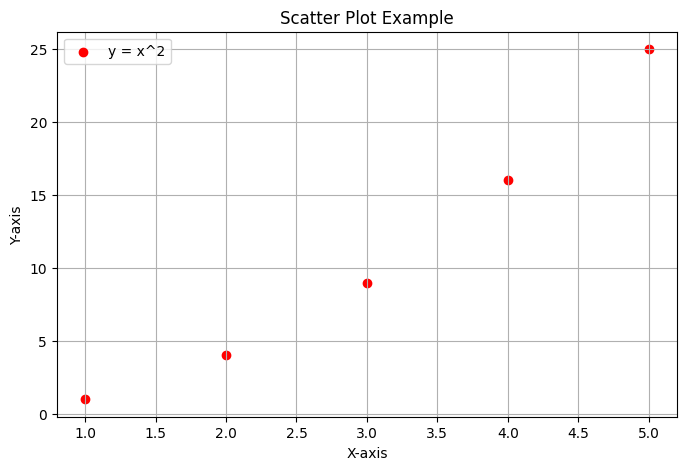

In [ ]:
# Data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='y = x^2')

# Add annotations
plt.title("Scatter Plot Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


3. Customizing Plots

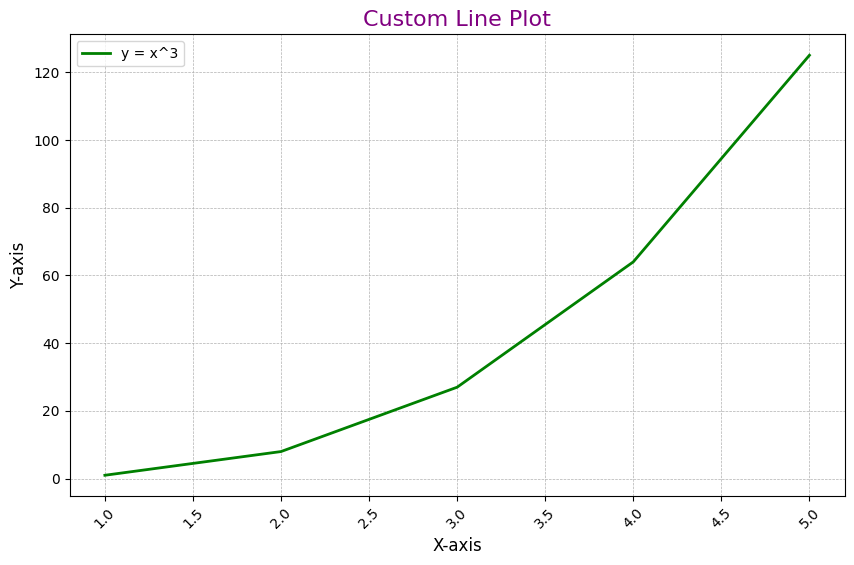

In [ ]:
# Data
x = [1, 2, 3, 4, 5]
y = [1, 8, 27, 64, 125]

# Line plot with customization
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='green', linewidth=2, label='y = x^3')
plt.title("Custom Line Plot", fontsize=16, color='purple')
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=10, rotation=45)  # Customize x-ticks
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()


4. Subplots

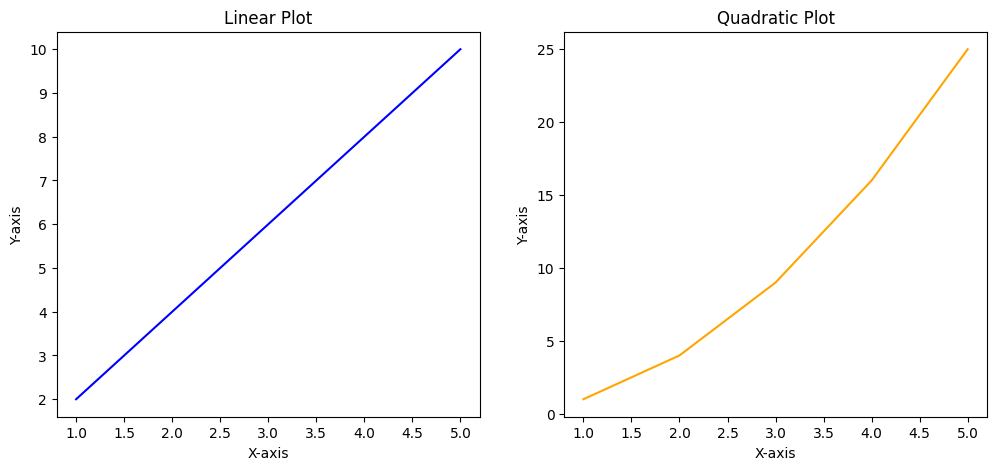

In [ ]:
# Data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 4, 9, 16, 25]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
axes[0].plot(x, y1, color='blue', label='y = 2x')
axes[0].set_title("Linear Plot")
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
# axes[0].legend()

# Second subplot
axes[1].plot(x, y2, color='orange', label='y = x^2')
axes[1].set_title("Quadratic Plot")
axes[1].set_xlabel("X-axis")
axes[1].set_ylabel("Y-axis")
# axes[1].legend()

# plt.tight_layout()
plt.show()


5. Bar Charts

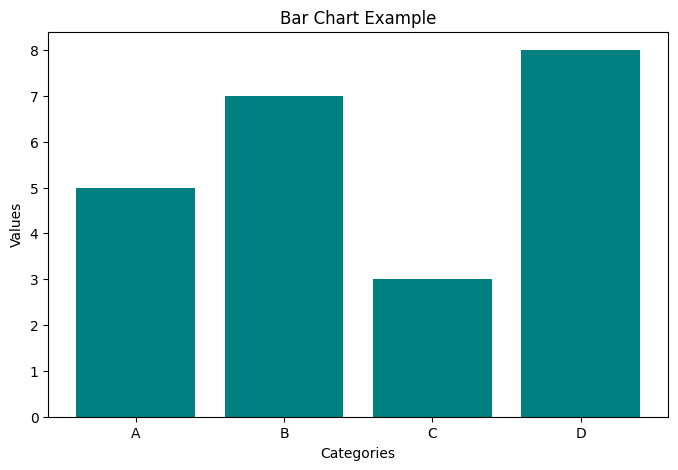

In [ ]:
# Data
categories = ['A', 'B', 'C', 'D']
values = [5, 7, 3, 8]

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='teal')
plt.title("Bar Chart Example")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()


6. Histograms

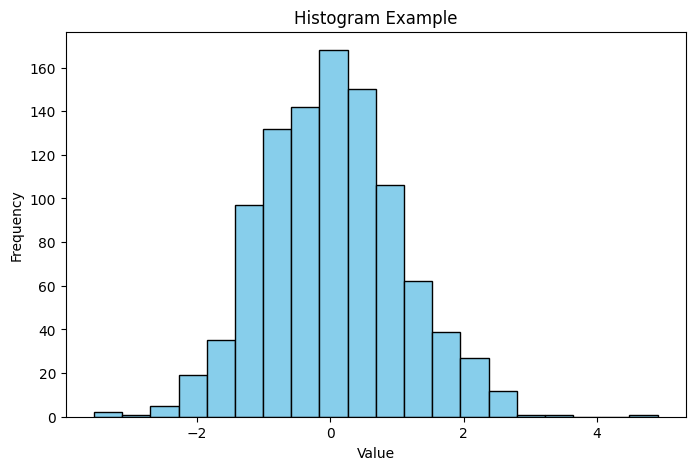

In [ ]:
# Data
data = np.random.randn(1000)

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


7. Pie Charts

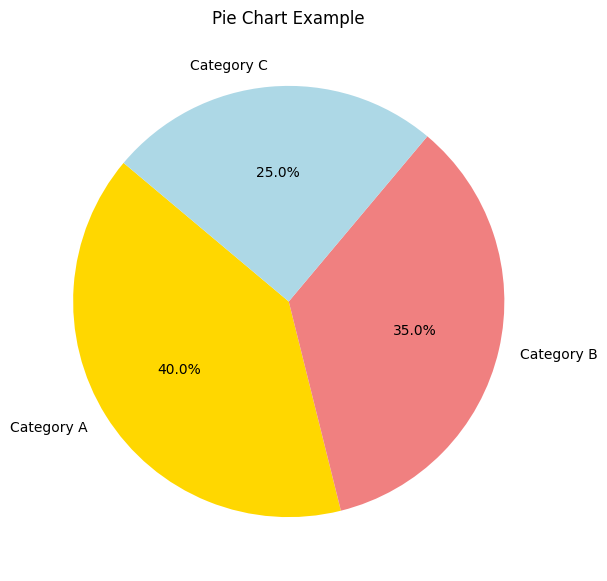

In [ ]:
# Data
labels = ['Category A', 'Category B', 'Category C']
sizes = [40, 35, 25]

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightblue'])
plt.title("Pie Chart Example")
plt.show()


# NumPy

You are an expert Python tutor specializing in numerical computing with NumPy. Provide me with a detailed, step-by-step guide to effectively utilize NumPy for various tasks. Your instructions should include explanations in text with code examples embedded directly in the text (not as separate chunks).

Use fake data generated directly with NumPy to demonstrate its features. Start by creating a sample dataset (e.g., random arrays) and explaining the structure of the data. Cover topics such as inspecting the data (shape, dimensions, data types), slicing and indexing, performing basic arithmetic operations, aggregations (mean, sum, etc.), and common manipulations like reshaping and stacking arrays.

Focus on showcasing the strengths of NumPy and how it simplifies numerical computation, without using additional libraries for now.



Step 1: Import NumPy and Create a Sample Dataset
Start by importing NumPy and generating random data. NumPy arrays are the primary data structure and can be created from scratch.

In [ ]:
# prompt: import NumPy
# generate random data 4 rows X 5 columns
# show the sape of this data

import numpy as np

# Generate random data: a 4x5 array of random numbers between 0 and 1
data = np.random.rand(4, 5)
# print(data)
print(data[0])


# Show the shape of the data
print("\nShape of the data:", data.shape) # Output: (4, 5) indicating 4 rows and 5 columns

[0.61287197 0.54613789 0.64515376 0.72028942 0.41173306]

Shape of the data: (4, 5)


Step 2: Inspect the Data
Understanding the structure of the data is critical. Here’s how to inspect the shape, dimensions, and data types of a NumPy array:

In [ ]:
# prompt: inspect the shape, dimensions, and data types of data which is a numpy array

import numpy as np

# Assuming 'data' is your NumPy array (replace with your actual array)
# Example: data = np.random.rand(4, 5)  # Create a 4x5 array of random numbers

# Inspect the shape of the data
print("Shape of the data:", data.shape)

# Inspect the dimensions of the data
print("Dimensions of the data:", data.ndim)

# Inspect the data type of the array elements
print("Data type of the array elements:", data.dtype)

Shape of the data: (4, 5)
Dimensions of the data: 2
Data type of the array elements: float64


Step 3: Slicing and Indexing
Slicing and indexing allow you to access specific elements, rows, or columns of an array:

In [ ]:
# prompt: slice first row of data which is a numpy array

print(data[0,:])

[0.61287197 0.54613789 0.64515376 0.72028942 0.41173306]


Step 4: Perform Basic Arithmetic Operations
NumPy allows element-wise arithmetic on arrays, making operations concise and efficient:

In [ ]:
# Add a scalar to the entire array
print("Add 5:\n", data + 5)

# Multiply each element by 2
print("Multiply by 2:\n", data * 2)

# Element-wise addition with another array
array2 = np.random.rand(4, 5)
print("Element-wise addition:\n", data + array2)

# Element-wise multiplication
print("Element-wise multiplication:\n", data * array2)


Add 5:
 [[5.61287197 5.54613789 5.64515376 5.72028942 5.41173306]
 [5.86011193 5.40967246 5.88529826 5.81491952 5.33352001]
 [5.28350737 5.50019433 5.85723745 5.71265164 5.97683408]
 [5.88684159 5.23734585 5.65969137 5.91386296 5.37309639]]
Multiply by 2:
 [[1.22574394 1.09227577 1.29030753 1.44057883 0.82346611]
 [1.72022386 0.81934492 1.77059652 1.62983903 0.66704001]
 [0.56701475 1.00038866 1.7144749  1.42530329 1.95366815]
 [1.77368319 0.47469171 1.31938274 1.82772592 0.74619279]]
Element-wise addition:
 [[1.30100517 1.52488204 1.21508403 1.09567134 1.34880468]
 [1.30678596 1.01166283 1.09567573 1.64755616 1.13914479]
 [0.37692088 1.46469384 1.71145783 1.21811465 1.56054658]
 [1.75475755 0.62987646 0.86537303 1.34273325 1.32732088]]
Element-wise multiplication:
 [[0.42173755 0.53452926 0.36769266 0.27038363 0.38582336]
 [0.38418966 0.24661888 0.18624681 0.67853185 0.26869198]
 [0.02648342 0.48243719 0.7322697  0.36021904 0.57019027]
 [0.76970397 0.09316551 0.13568642 0.39192867 0.3

Step 5: Aggregations
Aggregation functions are built into NumPy to calculate statistics efficiently:

In [ ]:
# Calculate the mean
print("Mean of all elements:", data.mean())

# Calculate the sum
print("Sum of all elements:", data.sum())

# Calculate the maximum and minimum
print("Max value:", data.max())
print("Min value:", data.min())

# Aggregation along specific axes
print("Mean across rows:", data.mean(axis=1))  # Row-wise mean
print("Sum across columns:", data.sum(axis=0))  # Column-wise sum


Mean of all elements: 0.6320485656588651
Sum of all elements: 12.640971313177303
Max value: 0.9768340751698263
Min value: 0.23734585449747336
Mean across rows: [0.58723722 0.66070444 0.66608497 0.61416763]
Sum across columns: [2.64333287 1.69335053 3.04738084 3.16172354 2.09518353]


Step 6: Reshape Arrays
Reshaping changes the structure of an array without modifying the data:

In [ ]:
# Reshape the array into a 10x2 matrix
reshaped_data = data.reshape(10, 2)
print("Reshaped array (10x2):\n", reshaped_data)

# Flatten the array into a 1D array
flattened_data = data.flatten()
print("Flattened array:\n", flattened_data)


Reshaped array (10x2):
 [[0.61287197 0.54613789]
 [0.64515376 0.72028942]
 [0.41173306 0.86011193]
 [0.40967246 0.88529826]
 [0.81491952 0.33352001]
 [0.28350737 0.50019433]
 [0.85723745 0.71265164]
 [0.97683408 0.88684159]
 [0.23734585 0.65969137]
 [0.91386296 0.37309639]]
Flattened array:
 [0.61287197 0.54613789 0.64515376 0.72028942 0.41173306 0.86011193
 0.40967246 0.88529826 0.81491952 0.33352001 0.28350737 0.50019433
 0.85723745 0.71265164 0.97683408 0.88684159 0.23734585 0.65969137
 0.91386296 0.37309639]


Step 7: Stack and Concatenate Arrays
NumPy makes it easy to combine arrays:

In [ ]:
# Stack arrays vertically (row-wise)
vertical_stack = np.vstack([data, array2])
print("Vertical stack:\n", vertical_stack)

# Stack arrays horizontally (column-wise)
horizontal_stack = np.hstack([data, array2])
print("Horizontal stack:\n", horizontal_stack)


Vertical stack:
 [[0.61287197 0.54613789 0.64515376 0.72028942 0.41173306]
 [0.86011193 0.40967246 0.88529826 0.81491952 0.33352001]
 [0.28350737 0.50019433 0.85723745 0.71265164 0.97683408]
 [0.88684159 0.23734585 0.65969137 0.91386296 0.37309639]
 [0.6881332  0.97874415 0.56993026 0.37538192 0.93707163]
 [0.44667403 0.60199037 0.21037747 0.83263665 0.80562479]
 [0.09341351 0.96449951 0.85422039 0.505463   0.58371251]
 [0.86791596 0.3925306  0.20568166 0.42887029 0.95422448]]
Horizontal stack:
 [[0.61287197 0.54613789 0.64515376 0.72028942 0.41173306 0.6881332
  0.97874415 0.56993026 0.37538192 0.93707163]
 [0.86011193 0.40967246 0.88529826 0.81491952 0.33352001 0.44667403
  0.60199037 0.21037747 0.83263665 0.80562479]
 [0.28350737 0.50019433 0.85723745 0.71265164 0.97683408 0.09341351
  0.96449951 0.85422039 0.505463   0.58371251]
 [0.88684159 0.23734585 0.65969137 0.91386296 0.37309639 0.86791596
  0.3925306  0.20568166 0.42887029 0.95422448]]



## Step-by-Step Guide to Creating a Single-Neuron Neural Network for Shape Classification
A single-neuron neural network is a simple yet effective way to understand how neural networks process information. This guide demonstrates how to classify shapes into categories (circle, square, triangle, rectangle) using Python and NumPy.

Step 1: Preprocess Shape Data
We’ll first flatten the binary matrices representing the shapes into 1D vectors and assign numerical labels to the shapes.

In [ ]:
import numpy as np

# Define the shapes as binary matrices
shapes = {
    "square": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ]),
    "triangle": np.array([
        [1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]
    ]),
    "circle": np.array([
        [0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 0, 0, 1],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0]
    ]),
    "rectangle": np.array([
        [0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]
    ])
}

# Flatten each shape into a 1D vector
flattened_shapes = {name: matrix.flatten() for name, matrix in shapes.items()}

# Create the input dataset (X) and labels (y)
X = np.array(list(flattened_shapes.values()))
y = np.array([0, 1, 2, 3])  # Labels: square=0, triangle=1, circle=2, rectangle=3


Step 2: Define the Single-Neuron Model
The neuron includes weights, bias, and an activation function (softmax for multi-class classification).

python
Copy code


In [ ]:
# Initialize weights and bias
weights = np.random.randn(25, 4)  # 25 inputs, 4 output classes
bias = np.random.randn(4)

# Define the softmax activation function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Numerical stability adjustment
    return exp_z / exp_z.sum(axis=1, keepdims=True)

# Forward pass function
def forward(X, weights, bias):
    z = np.dot(X, weights) + bias  # Weighted sum
    return softmax(z)  # Apply softmax to produce probabilities


Step 3: Train the Model
We’ll use the cross-entropy loss function and gradient descent for optimization.



In [ ]:
# Define cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    n = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(n), y_true])
    return log_likelihood.mean()

# One-hot encode the labels for gradient calculation
y_one_hot = np.eye(4)[y]

# Training parameters
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = forward(X, weights, bias)

    # Calculate loss
    loss = cross_entropy_loss(y, y_pred)

    # Backward pass (gradient calculation)
    grad_z = y_pred - y_one_hot  # Gradient of loss w.r.t. z
    grad_w = np.dot(X.T, grad_z) / X.shape[0]  # Gradient w.r.t. weights
    grad_b = grad_z.mean(axis=0)  # Gradient w.r.t. bias

    # Update weights and bias
    weights -= learning_rate * grad_w
    bias -= learning_rate * grad_b

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 5.075498634702265
Epoch 100, Loss: 3.2635433407682872
Epoch 200, Loss: 1.9550337758707352
Epoch 300, Loss: 0.8796040189138516
Epoch 400, Loss: 0.3178936530108522
Epoch 500, Loss: 0.17249133855133564
Epoch 600, Loss: 0.11849543962356583
Epoch 700, Loss: 0.09112808959797113
Epoch 800, Loss: 0.07464702427270875
Epoch 900, Loss: 0.06359531009335458


Step 4: Validate the Model
After training, test the model's performance on the training data.

In [ ]:
# Test the model
y_pred = forward(X, weights, bias)
predictions = np.argmax(y_pred, axis=1)  # Get the predicted class
print("Predicted labels:", predictions)
print("True labels:", y)


Predicted labels: [0 1 2 3]
True labels: [0 1 2 3]


In [ ]:
# Define an imperfect square
imperfect_square = np.array([
    [0,1,1,0,0],
    [0,1,0,1,1],
    [1,0,0,0,1],  # A small imperfection here
    [0,1,0,1,0],
    [0,0,1,0,0]
])

# Flatten the matrix into a vector
imperfect_square_flattened = imperfect_square.flatten().reshape(1, -1)  # Shape (1, 25)

# Predict the label using the trained model
y_pred = forward(imperfect_square_flattened, weights, bias)
predicted_label = np.argmax(y_pred, axis=1)[0]  # Get the predicted class

# Display the result
print("Predicted label for the imperfect square:", predicted_label)



Predicted label for the imperfect square: 2
